# Task 6.7

### This script contains the following:

#### 1. Importing libraries and data.
#### 2. Subset necessary data
#### 3. Exploratory Analysis
     - Top Revenue Generating States
     - Top Revenue Generating Departments   
#### 4. Delivery Time and Review-Score Analysis 
     - Late Deliveries
     - Review Score
     - Review Score x Delivery Time
     - Hypothesis Test: Pearson Correlation Coefficient (r-value)
#### 5. Reprocessing before running the k-means algorithm
#### 6. K-means Clustering with PCA
#### 7. Run the k-means algorithm
#### 8. Create a visualizations using the clustered data
#### 9. Calculate the descriptive statistics for the clusters

### 1. Importing Libraries and Data

#### Import Data

In [272]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
from scipy.stats import pearsonr

import sklearn
from sklearn.cluster import KMeans # That is this spesific k-mean algorithm from scikit-learn, that will be used.
from sklearn.preprocessing import StandardScaler # For standardizing features I'll the StandardScaler module.
from sklearn.decomposition import PCA # another module from sk for machine learning.
import pylab as pl # Pylab is a convenience module that bulk import matplotlib.

import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

In [2]:
# define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\Achievement 6\02-2024 Brazilian E-Commerce'

In [3]:
# This option ensures that the graphs I create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Set display options to show all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Import Data

In [9]:
olist_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_hours_out.csv'), index_col = False)

In [37]:
olist_all.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer,avg_items_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-10-10,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593,8,4.5,4.0,2,1.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15,2017-08-18,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593,2,2.0,4.0,1,1.0
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23,2017-11-07,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593,14,14.0,3.0,1,1.0
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06,2017-08-14,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593,7,7.0,5.0,1,1.0
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11,2017-09-23,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593,11,11.0,5.0,1,1.0


### 3. Subset necessary variables

In [215]:
olist_all.columns

Index(['order_id', 'customer_id', 'purchase_date', 'delivered_customer_date',
       'estimated_delivery_date', 'item_count', 'product_id', 'seller_id',
       'price', 'freight_value', 'prod_category', 'Price category',
       'review_score', 'review_title', 'review_comment', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_geolocation_lat', 'seller_geolocation_lng', 'delivery_time',
       'avg_delivery_time', 'avg_review_score', 'sum_of_orders_by_customer',
       'avg_items_per_order', 'late_delivery_time'],
      dtype='object')

In [218]:
sub_olist = olist_all[['order_id', 'customer_id', 'purchase_date', 'delivered_customer_date',
       'estimated_delivery_date', 'item_count', 'product_id','price', 'freight_value', 'prod_category', 'Price category',
       'review_score', 'review_title', 'review_comment', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'delivery_time',
       'avg_delivery_time', 'avg_review_score', 'sum_of_orders_by_customer',
       'avg_items_per_order', 'late_delivery_time']]

In [281]:
# Export the subset contaning the needed variables

sub_olist.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'olist_analysis.csv'),index= False)

In [219]:
sub_olist.shape

(101992, 26)

In [220]:
sub_olist.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer,avg_items_per_order,late_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-10-10,2017-10-18,1,87285b34884572647811a353c7ac498a,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,8,4.5,4.0,2,1.0,8
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15,2017-08-18,2017-08-28,1,87285b34884572647811a353c7ac498a,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,2,2.0,4.0,1,1.0,10
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23,2017-11-07,2017-11-13,1,87285b34884572647811a353c7ac498a,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,14,14.0,3.0,1,1.0,6
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06,2017-08-14,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,7,7.0,5.0,1,1.0,15
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11,2017-09-23,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,11,11.0,5.0,1,1.0,4


##### - Top Revenue Generating States

In [221]:
sub_olist['customer_state'].value_counts().head()

customer_state
SP    43752
RJ    13294
MG    12042
RS     5707
PR     5242
Name: count, dtype: int64

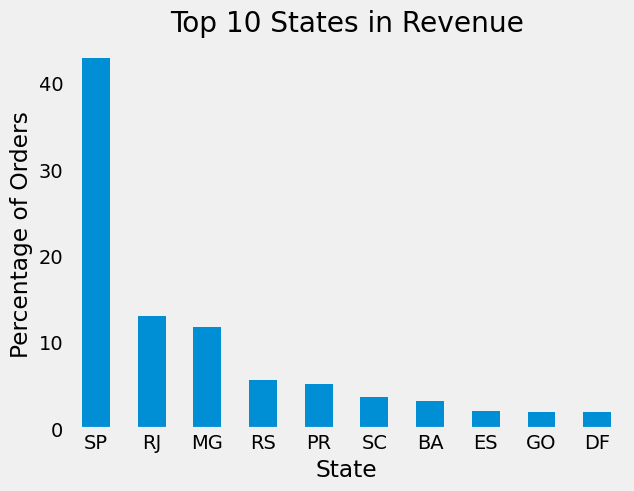

In [222]:
# Compute normalized values % for the top 10 states in Revenue by Olist
normalized_values = (sub_olist['customer_state'].value_counts(normalize=True).head(10) * 100)

# Create bar chart for the top 10 states with normalized values
bar_top_10_states_normalized = normalized_values.plot.bar(title='Top 10 States in Revenue')

# Set axis labels
bar_top_10_states_normalized.set_ylabel('Percentage of Orders')
bar_top_10_states_normalized.set_xlabel('State')

# Rotate x-axis labels
bar_top_10_states_normalized.set_xticklabels(bar_top_10_states_normalized.get_xticklabels(), rotation=0)

# Show plot
plt.grid(False)
plt.show()


#### São Paulo (SP): Responsible for more than 40% of revenue overall.
#### Rio de Janeiro (RJ): Responsible for about 10% of revenue.
####  Gerais (MG): Also responsible for about 10% of revenue.
####  Other 24 Brazilian states: Together, they share the remaining 40% of orders.

#### This distribution illustrates the concentration of revenue in a few key states, particularly São Paulo, while the rest of the states collectively contribute a significant portion of orders but with relatively lower revenue shares.

#### - Top Revenue Generating Departments

In [223]:
sub_olist['prod_category'].value_counts(dropna= False).head()

prod_category
bed_bath_table           10405
health_beauty             9115
sports_leisure            7901
furniture_decor           7771
computers_accessories     7119
Name: count, dtype: int64

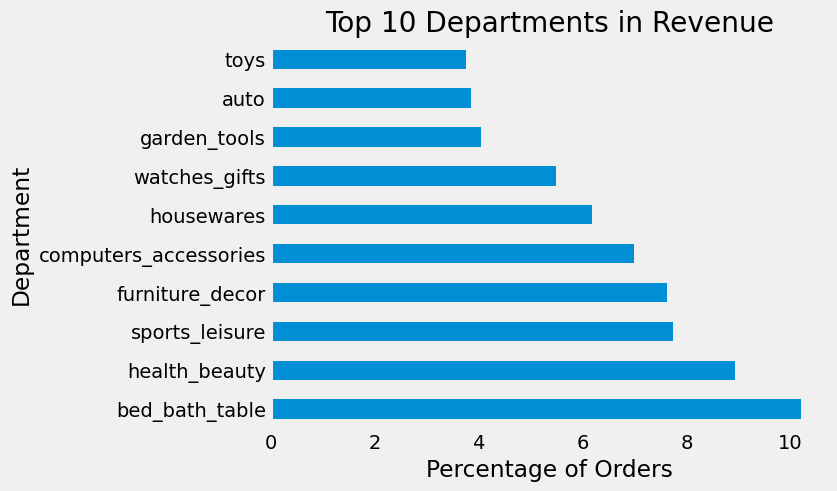

In [273]:
# Compute normalized values % for the top 10 departments in revenue
normalized_values_dep = (sub_olist['prod_category'].value_counts(normalize=True).head(10) * 100)

# Create bar chart for the top 10 departments with normalized values
bar_top_10_dep_normalized = normalized_values_dep.plot.barh(title='Top 10 Departments in Revenue')

# Set axis labels
bar_top_10_dep_normalized.set_ylabel('Department')
bar_top_10_dep_normalized.set_xlabel('Percentage of Orders')

# Rotate y-axis labels
bar_top_10_dep_normalized.set_yticklabels(bar_top_10_dep_normalized.get_yticklabels(), rotation=0)

# Show plot
plt.grid(False)
plt.show()


##### There are 71 products category listed on Olist E-Commerce, above we can observe the top 10 categories,
##### which together contribute with 64% of revenue.

#### Bed, Bath and Table is the most popular category.

In [145]:
normalized_values_dep.head()

prod_category
bed_bath_table           10.201781
health_beauty             8.936975
sports_leisure            7.746686
furniture_decor           7.619225
computers_accessories     6.979959
Name: proportion, dtype: float64

### 4. Delivery Time and Review-Score Analysis 

#### Late Deliveries

In [226]:
# Check variables to calculate late deliveries

sub_olist[['delivered_customer_date', 'estimated_delivery_date']].head()

,delivered_customer_date,estimated_delivery_date
0,2017-10-10,2017-10-18
1,2017-08-18,2017-08-28
2,2017-11-07,2017-11-13
3,2017-08-14,2017-08-29
4,2017-09-23,2017-09-27


#### Deriving a 'late delivery time' column

In [227]:
# Convert columns to datetime format
sub_olist['delivered_customer_date'] = pd.to_datetime(sub_olist['delivered_customer_date'])
sub_olist['estimated_delivery_date'] = pd.to_datetime(sub_olist['estimated_delivery_date'])

# Calculate delivery time
sub_olist['late_delivery_time'] = (sub_olist['estimated_delivery_date'] - sub_olist['delivered_customer_date']).dt.days


#### Check for extreme values

<Axes: xlabel='late_delivery_time', ylabel='Density'>

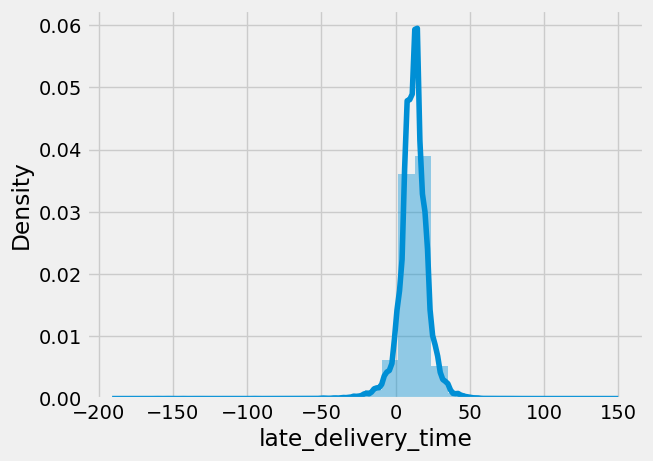

In [228]:
sns.distplot(sub_olist['late_delivery_time'], bins=30) # Shows extreme values


In [229]:
# Convert negative values to zero
sub_olist['late_delivery_time'] = sub_olist['late_delivery_time'].apply(lambda x: max(x, 0))

##### From all orders made through the Olist Platform, only 7.7% were delivered on time, indicating that the remaining 92.3% of orders were delivered to customers with some delay. This suggests that the delivery service has been underperforming.

In [230]:
# Porcentage of late deliveries
sub_olist['late_delivery_time'].value_counts(normalize = True).head() * 100

late_delivery_time
0     7.683936
14    7.454506
13    6.141658
15    5.568084
7     4.994509
Name: proportion, dtype: float64

#### - Review Score

In [231]:
sub_olist['review_score'].value_counts(dropna = False)

review_score
5    58792
4    19577
1    11592
3     8605
2     3426
Name: count, dtype: int64

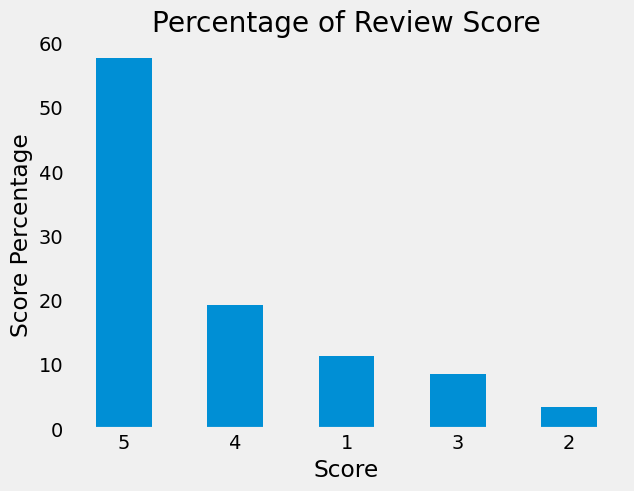

In [232]:
# Normalize values % for the review score
bar_review = (sub_olist['review_score'].value_counts(normalize=True) * 100)

# Create bar chart for the reviews-score with normalized values
bar_chart = bar_review.plot.bar(title='Percentage of Review Score')

# Set axis labels using the Axes object
bar_chart.set_ylabel('Score Percentage')
bar_chart.set_xlabel('Score')

# Rotate y-axis labels
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=0)

# Show plot
plt.grid(False)
plt.show()

In [213]:
# Percentage of review score among the orders

bar_review

review_score
5    57.643737
4    19.194643
1    11.365597
3     8.436936
2     3.359087
Name: proportion, dtype: float64

#### Review Score x Late Delivery Time

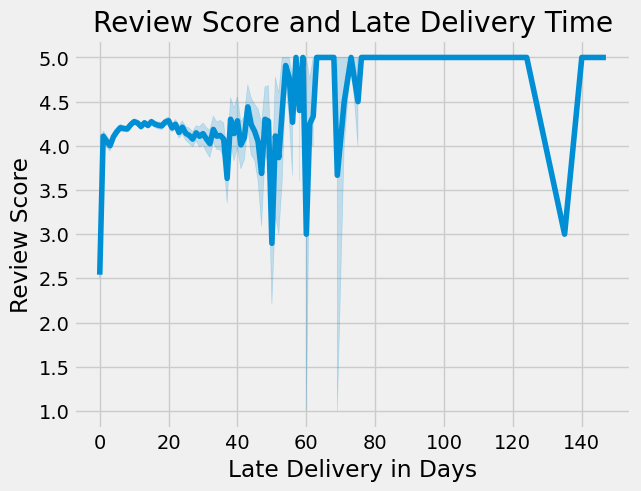

In [233]:
# Create a line chart
line = sns.lineplot(data=sub_olist, x='late_delivery_time', y='review_score')

# Add title and labels
line.set_title('Review Score and Late Delivery Time')
line.set_xlabel('Late Delivery in Days')
line.set_ylabel('Review Score')

# Show the plot
plt.show()


##### There is a correlation between review scores and late delivery times. Although the majority of reviews are positive (about 75%, 4 and 5 stars), a significant number of negative reviews (about 15%, 1 and 2 stars) may be associated with considerable delays in order delivery.

#### Hypothesis testing

##### Null Hypothesis: The reviews score, one way to measure the customer satisfaction, do not change over time.
##### Alternative Hypothesis: The reviews score do change over time.

In [234]:
# Statistical Test
x_delivery_time = sub_olist['late_delivery_time']
y_review_score = sub_olist['review_score']

# Calculate Pearson correlation coefficient
r_value, p_value = pearsonr(x_delivery_time, y_review_score)

print("Pearson correlation coefficient (r-value):", r_value)
print("P-value:", p_value)


Pearson correlation coefficient (r-value): 0.15353252997813868
P-value: 0.0


### 5. Reprocessing before the k-means algorithm.

In [237]:
#select numerical columns
columns = ['item_count', 'price', 'freight_value', 'review_score', 'late_delivery_time', 'sum_of_orders_by_customer']

# Create a subset

df_cluster = sub_olist[columns]

In [238]:
df_cluster.head()

,item_count,price,freight_value,review_score,late_delivery_time,sum_of_orders_by_customer
0,1,29.99,8.72,4,8,2
1,1,29.99,7.78,4,10,1
2,1,29.99,14.10,3,6,1
3,1,44.49,15.10,5,15,1
4,1,48.90,16.60,5,4,1


#### Standardize the dataframe in order to avoid bias and to optimize the module's performance 
      Because the observations in the choosen variables diver a lot, a standardization as a preprocessing method
      before running the kmean modul is pretty handy.

In [240]:
scaler = StandardScaler()

In [241]:
df_std = scaler.fit_transform(df_cluster)

##### Principal Component Analysis (PCA) applied to the standardized DataFrame 'df_std'
##### This statistical method will be used to simplify the complexity of the df by reducing its dimensionality while preserving  important information. It identifies the most significant patterns in the data and represents them as a set of orthogonal (uncorrelated) variables called principal components.      

In [246]:
pca = PCA()

In [247]:
pca.fit(df_std)

PCA()

In [248]:
# The attribute shows how much variance is explained by each of the seven individual components
pca.explained_variance_ratio_

array([0.29318924, 0.23307727, 0.18889779, 0.13444226, 0.0970274 ,
       0.05336603])

Text(0, 0.5, 'Cumulative Explained Variance')

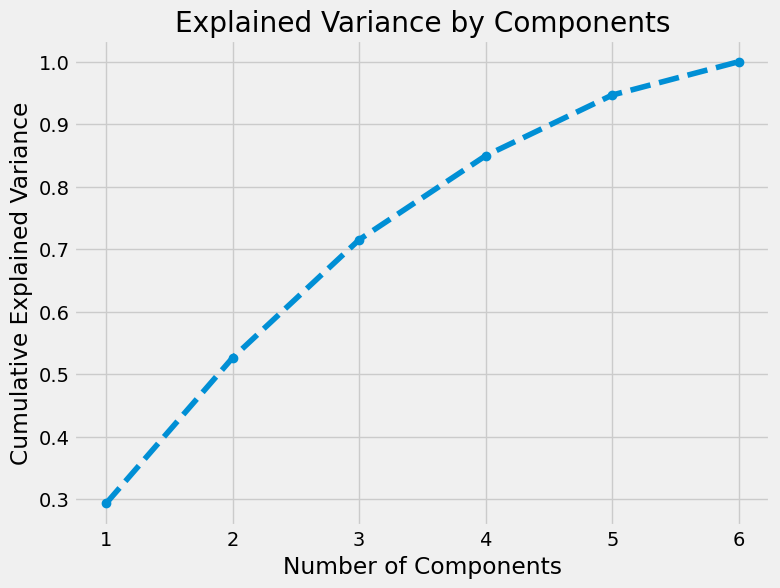

In [251]:
plt.figure(figsize = (8,6))
plt.plot(range(1,7),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

##### according to reserach, the graph shows the amount of variance captured (on the y-axis) depending on the number of components are included (the x-axis). 'A rule of thumb is to preserve around 80 % of the variance. I decide to keep the next procedures with 4 components to cluster the data set later on.

#### Perform PCA 

In [252]:
# PCA with the chosen number of components (5)

pca = PCA(n_components = 4)

In [253]:
# Fit the model on the data with the selected number of components (5)

pca.fit(df_std)

PCA(n_components=4)

##### Calculated resulting components scores for the elements in our data set, that well be need in the next step

In [254]:
pca.transform(df_std)

array([[ 0.27880372, -0.89045642, -0.42853809, -0.24375116],
       [-0.21203181, -1.01311737, -0.32646682,  0.01496246],
       [-0.07901406, -0.71009427, -1.17676586,  0.25013518],
       ...,
       [-1.57439111,  4.19723484,  0.69080494,  0.02246766],
       [-1.65407894,  4.0047362 , -0.06636748, -0.96847119],
       [-0.69044421,  0.29334803,  0.75544369,  0.03517199]])

In [255]:
scores_pca = pca.transform(df_std)

### 6. K-means Clustering with PCA 

#### Elbow TechniqueElbow Technique

In [256]:
# Fit k-means using the transformed data from PCA

# For each value of K, we are calculating WCSS (Within-Cluster Sum of Square).
# WCSS is the sum of the squared distance between each point and the centroid in a cluster.

wcss = [] 
for i in range (1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

#### Plotting the WCSS against the number of components on a graph.

Text(0, 0.5, 'K-means with PCA Clustering')

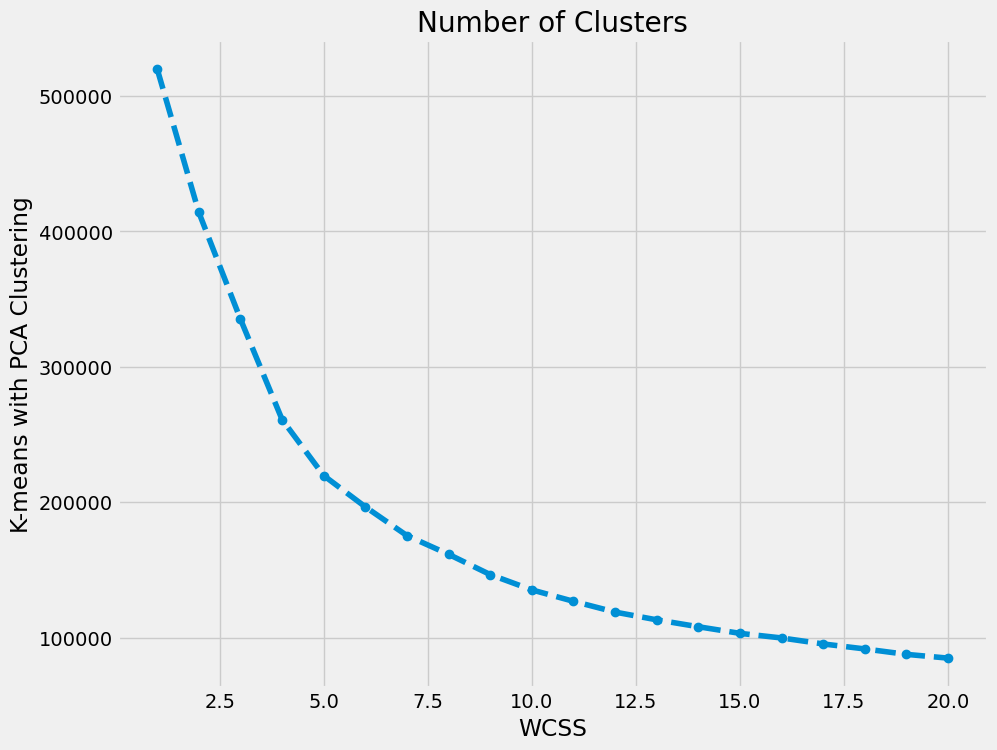

In [257]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.title('Number of Clusters')
plt.xlabel('WCSS')
plt.ylabel('K-means with PCA Clustering')

##### The elbow method consists of looking for a kink or elbow in the WCSS graph. That is, the part of the graph before the elbow would be steeply declining, while the part after it is much smoother. In this instance, we see a clear change or curve around the 5-cluster mark. Therefore, I'll be keeping a five-cluster solution.

### 7. Run the k-means algorithm

In [258]:
# Run the k-means algorithm with 5 clusters
# Same initializer and random state as before.

kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [259]:
# Fit the data with the k-means pca model

kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

#### Attach a new column to the dataframe with the resulting clusters. This will allow me to create a visualization using the clusters.

In [260]:
# Convert scaled data to a pandas DataFrame

df_std_converted = pd.DataFrame(df_std, columns=df_cluster.columns)

In [261]:
# Fit the k-means object to the data.

kmeans_pca.fit(df_std_converted)

KMeans(n_clusters=4, random_state=42)

In [262]:
df_std_converted['clusters'] = kmeans_pca.fit_predict(df_std_converted)

In [263]:
df_std_converted.head()

,item_count,price,freight_value,review_score,late_delivery_time,sum_of_orders_by_customer,clusters
0,-0.286506,-0.504609,-0.714800,-0.062358,-0.591262,0.360386,0
1,-0.286506,-0.504609,-0.774869,-0.062358,-0.343166,-0.386363,0
2,-0.286506,-0.504609,-0.370997,-0.805441,-0.839357,-0.386363,3
3,-0.286506,-0.424232,-0.307094,0.680724,0.277073,-0.386363,0
4,-0.286506,-0.399786,-0.211238,0.680724,-1.087453,-0.386363,0


### 8. Create a visualizations using the clustered data.

In [264]:
df_std_converted['clusters'].value_counts()

clusters
0    74106
3    19306
1     4586
2     3994
Name: count, dtype: int64

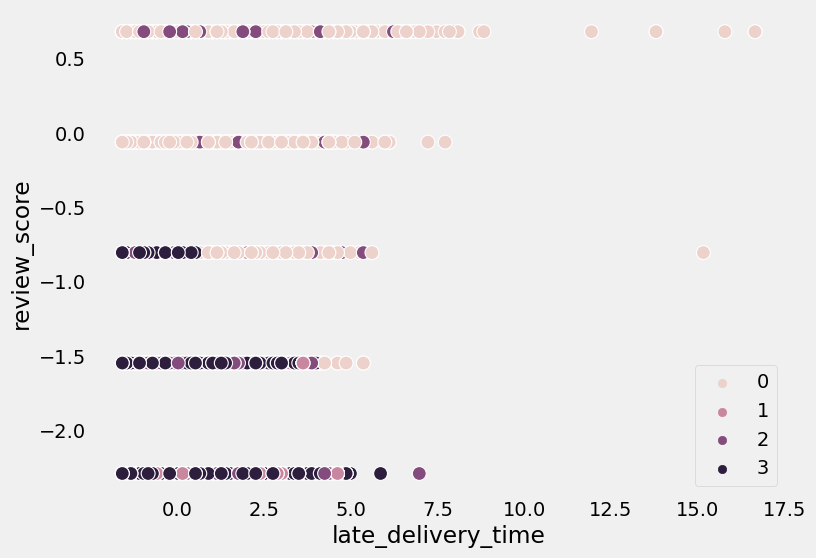

In [274]:
# Plot the clusters for the "late_delivery_tyme" and "review_score" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['late_delivery_time'], y=df_std_converted['review_score'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('late_delivery_time') # Label x-axis.
plt.ylabel('review_score') # Label y-axis.
plt.show()

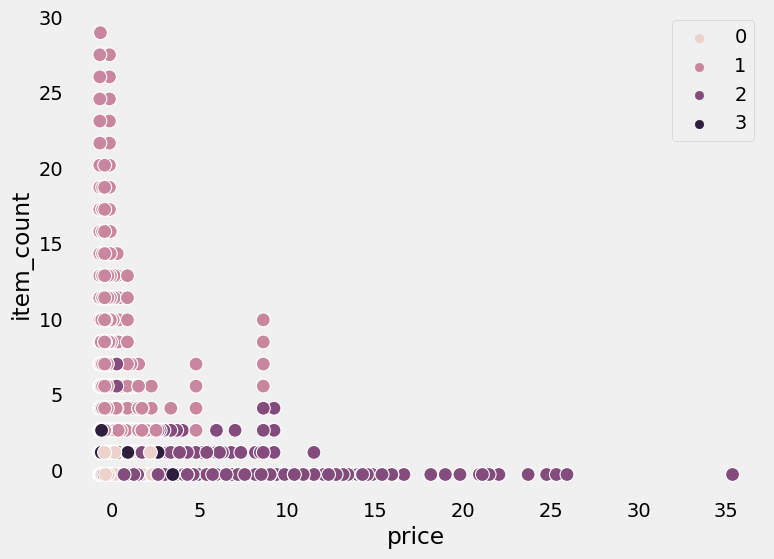

In [271]:
# Plot the clusters for the "price" and "item_count" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['price'], y=df_std_converted['item_count'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('price') # Label x-axis.
plt.ylabel('item_count') # Label y-axis.
plt.show()

### 9. Calculate the descriptive statistics for the clusters

In [275]:
df_std_converted.head()

,item_count,price,freight_value,review_score,late_delivery_time,sum_of_orders_by_customer,clusters
0,-0.286506,-0.504609,-0.714800,-0.062358,-0.591262,0.360386,0
1,-0.286506,-0.504609,-0.774869,-0.062358,-0.343166,-0.386363,0
2,-0.286506,-0.504609,-0.370997,-0.805441,-0.839357,-0.386363,3
3,-0.286506,-0.424232,-0.307094,0.680724,0.277073,-0.386363,0
4,-0.286506,-0.399786,-0.211238,0.680724,-1.087453,-0.386363,0


In [276]:
df_std_converted['clusters'].value_counts()

clusters
0    74106
3    19306
1     4586
2     3994
Name: count, dtype: int64

In [277]:
df_std_converted.groupby('clusters').agg({'item_count':['mean', 'median'], 
                          'price':['mean', 'median'], 
                           'freight_value':['mean', 'median'],
                           'review_score':['mean', 'median'],
                           'late_delivery_time':['mean', 'median'],
                           'sum_of_orders_by_customer':['mean', 'median']})

item_count               price           freight_value            \
               mean    median      mean    median          mean    median   
clusters                                                                    
0         -0.180959 -0.286506 -0.124183 -0.268966     -0.133996 -0.246385   
1          3.361070  2.640746 -0.250657 -0.393689     -0.125942 -0.289201   
2         -0.198923 -0.286506  3.180957  2.649542      2.971715  2.659320   
3         -0.062633 -0.286506 -0.121853 -0.267580     -0.070524 -0.220824   

         review_score           late_delivery_time            \
                 mean    median               mean    median   
clusters                                                       
0            0.467514  0.680724           0.092312  0.028977   
1           -0.471977 -0.062358           0.175584  0.153025   
2            0.054295  0.680724           0.121718  0.028977   
3           -1.693668 -2.291605          -0.421228 -0.467214   

         sum_of_orders_by_customer            
                              mean    median  
clusters                                      
0                        -0.178681 -0.386363  
1                         3.178526  2.600634  
2                        -0.240902 -0.386363  
3                        -0.019332 -0.386363

##### These results have not exibithed a strong correlation within the variables observed so far. However, we do have a pattern that shows some correlation: the price x quantity of items customers are ordering.

#### we have the following hypothesis:

The lower the product price, the higher the quantity of items per order.